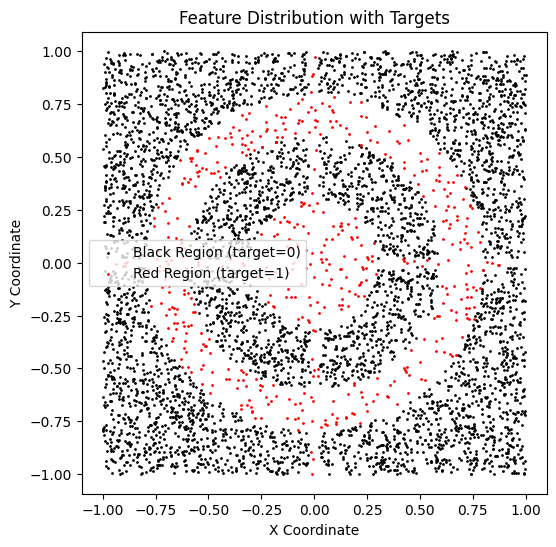

In [11]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('plot2_noisy_0/features.npy')
y = np.load('plot2_noisy_0/targets.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



In [12]:
import numpy as np

# 加载数据
black_data_test = np.load('plot2_noisy_0/black_region_noisy.npy')  # 黑色区域
red_data_test = np.load('plot2_noisy_0/red_region_noisy.npy')      # 红色区域

# 提取坐标
black_x_test = black_data_test[0, :]
black_y_test = black_data_test[1, :]
red_x_test = red_data_test[0, :]
red_y_test = red_data_test[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features_test = np.column_stack((black_x_test, black_y_test))  # 黑色特征
red_features_test = np.column_stack((red_x_test, red_y_test))       # 红色特征

black_target_test = np.zeros((black_features_test.shape[0],), dtype=int)  # 黑色标签：0
red_target_test = np.ones((red_features_test.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features_test = np.vstack((black_features_test, red_features_test))  # 合并所有特征
targets_test = np.hstack((black_target_test, red_target_test))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features_test.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features_test = features_test[indices]  # 按打乱后的索引重排特征
targets_test = targets_test[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_0/features_test.npy', features_test)  # 保存打乱的特征数组
np.save('plot2_noisy_0/targets_test.npy', targets_test)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features_test.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets_test.shape)   # (11000,)
print("前5个特征：\n", features_test[:5])
print("前5个标签：", targets_test[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[-0.37117737  0.10181595]
 [-0.39049859  0.81295222]
 [ 0.11081085  0.13660337]
 [ 0.84448387 -0.8796807 ]
 [-0.4296047   0.2088348 ]]
前5个标签： [0 0 1 0 0]


In [13]:
import numpy as np

# 加载数据
black_data = np.load('plot2_noisy_0/black_region_noisy.npy')  # 黑色区域
red_data = np.load('plot2_noisy_0/red_region_noisy.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_0/features.npy', features)  # 保存打乱的特征数组
np.save('plot2_noisy_0/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[-0.37117737  0.10181595]
 [-0.39049859  0.81295222]
 [ 0.11081085  0.13660337]
 [ 0.84448387 -0.8796807 ]
 [-0.4296047   0.2088348 ]]
前5个标签： [0 0 1 0 0]


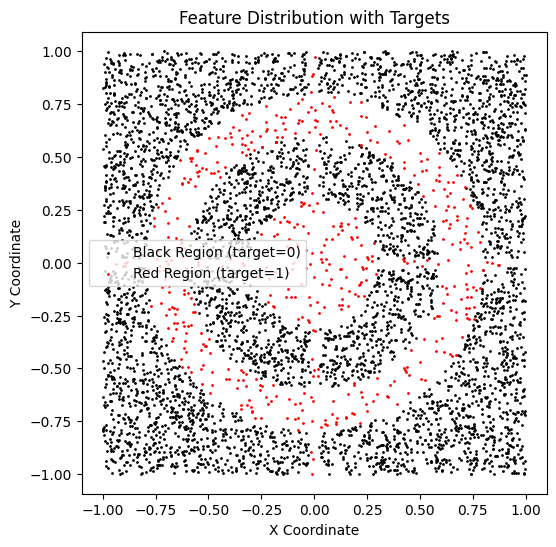

In [14]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('plot2_noisy_0/features.npy')
y = np.load('plot2_noisy_0/targets.npy')

X_test = np.load('plot2_noisy_0/features_test.npy')
y_test = np.load('plot2_noisy_0/targets_test.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-14 20:49:14,889 - DualGranularBalancedDeepForest
the shape of training samples: (5500, 2) - 2024-12-14 20:49:14,889 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-14 20:49:14,889 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-14 20:49:14,889 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 20:49:14,891 - DualGranularBalancedDeepForest
The shape of x_train is (5500, 2) - 2024-12-14 20:49:14,891 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9755, f1_score=0.9171, auc=0.9961, gmean=0.8652, sen=0.7500, spe=0.9980, aupr=0.9560 - 2024-12-14 20:49:16,922 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9791, f1_score=0.9301, auc=0.9967, gmean=0.8827, sen=0.7800, spe=0.9990, aupr=0.9665 - 2024-12-14 20:49:16,927 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9745, f1_score=0.9117, auc=0.9936, gmean=0.8485, sen=0.7200, spe=1.0000, aupr=0.9507 - 2024-12-14 20:49:16,933 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9818, f1_score=0.9401, auc=0.9971, gmean=0.8995, sen=0.8100, spe=0.9990, aupr=0.9736 - 2024-12-14 20:49:16,939 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9745, f1_score=0.9117, auc=0.9938, gmean=0.8485, sen=0.7200, spe=1.0000, aupr=0.9539 - 2024-12-14 20:49:16,943 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9809, f1_score=0.9409, auc=0.9916, gmean=0.9290, sen=0.8700, spe=0.9920, aupr=0.9626 - 2024-12-14 20:49:26,683 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9818, f1_score=0.9435, auc=0.9826, gmean=0.9295, sen=0.8700, spe=0.9930, aupr=0.9519 - 2024-12-14 20:49:26,688 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9845, f1_score=0.9526, auc=0.9934, gmean=0.9454, sen=0.9000, spe=0.9930, aupr=0.9764 - 2024-12-14 20:49:26,694 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9745, f1_score=0.9257, auc=0.9967, gmean=0.9401, sen=0.9000, spe=0.9820, aupr=0.9699 - 2024-12-14 20:49:26,699 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9791, f1_score=0.9376, auc=0.9912, gmean=0.9425, sen=0.9000, spe=0.9870, aupr=0.9606 - 2024-12-14 20:49:26,704 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9791, f1_score=0.9397, auc=0.9971, gmean=0.9613, sen=0.9400, spe=0.9830, aupr=0.9728 - 2024-12-14 20:49:39,625 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9864, f1_score=0.9586, auc=0.9980, gmean=0.9558, sen=0.9200, spe=0.9930, aupr=0.9787 - 2024-12-14 20:49:39,630 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9909, f1_score=0.9722, auc=0.9939, gmean=0.9676, sen=0.9400, spe=0.9960, aupr=0.9825 - 2024-12-14 20:49:39,637 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9818, f1_score=0.9464, auc=0.9873, gmean=0.9581, sen=0.9300, spe=0.9870, aupr=0.9506 - 2024-12-14 20:49:39,643 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9836, f1_score=0.9522, auc=0.9873, gmean=0.9683, sen=0.9500, spe=0.9870, aupr=0.9525 - 2024-12-14 20:49:39,649 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9864, f1_score=0.9589, auc=0.9986, gmean=0.9605, sen=0.9300, spe=0.9920, aupr=0.9858 - 2024-12-14 20:49:51,398 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9882, f1_score=0.9647, auc=0.9987, gmean=0.9708, sen=0.9500, spe=0.9920, aupr=0.9864 - 2024-12-14 20:49:51,404 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9873, f1_score=0.9615, auc=0.9932, gmean=0.9610, sen=0.9300, spe=0.9930, aupr=0.9738 - 2024-12-14 20:49:51,410 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9882, f1_score=0.9647, auc=0.9872, gmean=0.9708, sen=0.9500, spe=0.9920, aupr=0.9482 - 2024-12-14 20:49:51,415 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9818, f1_score=0.9469, auc=0.9874, gmean=0.9627, sen=0.9400, spe=0.9860, aupr=0.9506 - 2024-12-14 20:49:51,420 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 3
num_layers: 4


layer_4, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9882, f1_score=0.9647, auc=0.9885, gmean=0.9708, sen=0.9500, spe=0.9920, aupr=0.9698 - 2024-12-14 20:50:03,081 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9864, f1_score=0.9582, auc=0.9938, gmean=0.9511, sen=0.9100, spe=0.9940, aupr=0.9801 - 2024-12-14 20:50:03,086 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9855, f1_score=0.9552, auc=0.9927, gmean=0.9458, sen=0.9000, spe=0.9940, aupr=0.9620 - 2024-12-14 20:50:03,091 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9855, f1_score=0.9564, auc=0.9929, gmean=0.9600, sen=0.9300, spe=0.9910, aupr=0.9705 - 2024-12-14 20:50:03,096 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9873, f1_score=0.9611, auc=0.9989, gmean=0.9563, sen=0.9200, spe=0.9940, aupr=0.9888 - 2024-12-14 20:50:03,102 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 4
num_layers: 5
last_layer_index 3
last_layer_index 3
UncertaintyAwareDeepForest - Accuracy: 1.0000
UncertaintyAwareDeepForest - AUC: 1.0000
UncertaintyAwareDeepForest - AUPR: 1.0000
UncertaintyAwareDeepForest - Sensitivity: 1.0000
UncertaintyAwareDeepForest - Specificity: 1.0000
UncertaintyAwareDeepForest - G-Mean: 1.0000
UncertaintyAwareDeepForest - F1 Macro: 1.0000


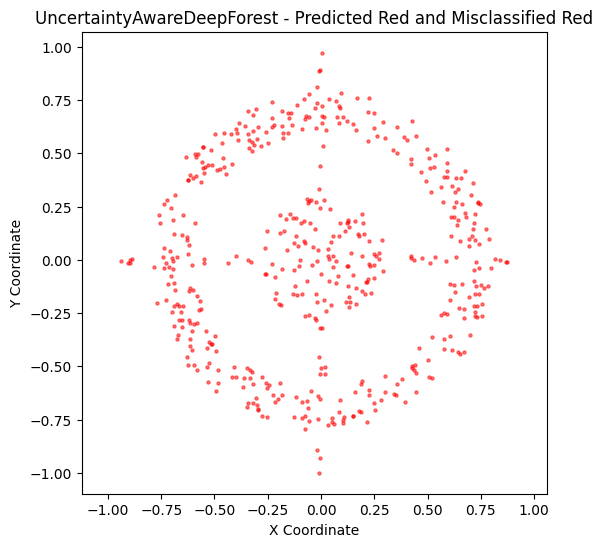

In [15]:
import os
# 配置输出文件夹
output_dir = "plot2_noisy_0"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training BalanceCascade...
BalanceCascade - Accuracy: 0.9975
BalanceCascade - AUC: 0.9999
BalanceCascade - AUPR: 0.9992
BalanceCascade - Sensitivity: 1.0000
BalanceCascade - Specificity: 0.9972
BalanceCascade - G-Mean: 0.9986
BalanceCascade - F1 Macro: 0.9924
Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 0.9998
SelfPacedEnsemble - AUC: 1.0000
SelfPacedEnsemble - AUPR: 1.0000
SelfPacedEnsemble - Sensitivity: 0.9980
SelfPacedEnsemble - Specificity: 1.0000
SelfPacedEnsemble - G-Mean: 0.9990
SelfPacedEnsemble - F1 Macro: 0.9994
Training UnderBagging...
UnderBagging - Accuracy: 0.9745
UnderBagging - AUC: 0.9995
UnderBagging - AUPR: 0.9942
UnderBagging - Sensitivity: 1.0000
UnderBagging - Specificity: 0.9720
UnderBagging - G-Mean: 0.9859
UnderBagging - F1 Macro: 0.9315
Training EasyEnsemble...
EasyEnsemble - Accuracy: 0.6282
EasyEnsemble - AUC: 0.8293
EasyEnsemble - AUPR: 0.4407
EasyEnsemble - Sensitivity: 0.9360
EasyEnsemble - Specificity: 0.5974
Eas

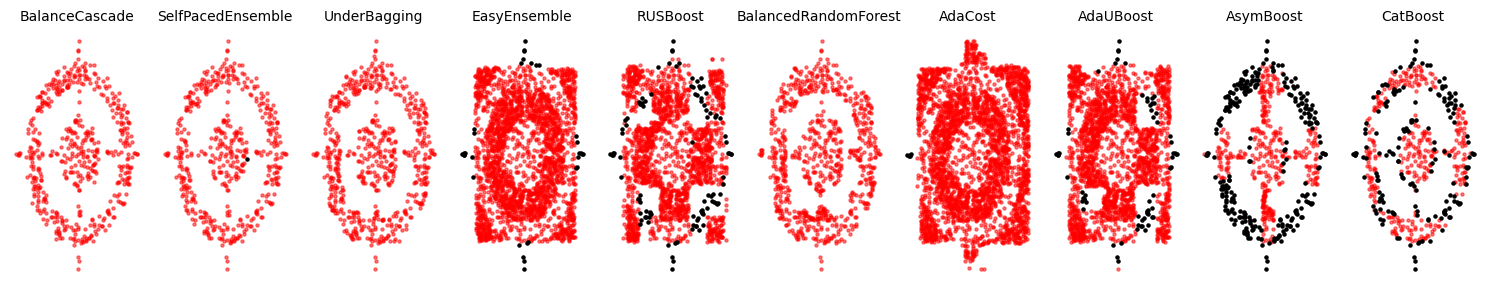

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "plot2_noisy_0"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50),
    'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9998
OverBagging - AUC: 1.0000
OverBagging - AUPR: 1.0000
OverBagging - Sensitivity: 0.9980
OverBagging - Specificity: 1.0000
OverBagging - G-Mean: 0.9990
OverBagging - F1 Macro: 0.9994
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.6815
SMOTEBoost - AUC: 0.8563
SMOTEBoost - AUPR: 0.5089
SMOTEBoost - Sensitivity: 0.8700
SMOTEBoost - Specificity: 0.6626
SMOTEBoost - G-Mean: 0.7593
SMOTEBoost - F1 Macro: 0.5613
Training OverBoost...
OverBoost - Accuracy: 0.6867
OverBoost - AUC: 0.8629
OverBoost - AUPR: 0.5299
OverBoost - Sensitivity: 0.8540
OverBoost - Specificity: 0.6700
OverBoost - G-Mean: 0.7564
OverBoost - F1 Macro: 0.5634
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7409
KmeansSMOTEBoost - AUC: 0.8414
KmeansSMOTEBoost - AUPR: 0.5118
KmeansSMOTEBoost - Sensitivity: 0.6880
KmeansSMOTEBoost - Specificity: 0.7462
KmeansSMOTEBoost - G-Mean: 0.7165
KmeansSMOTEBoost - F1 Macro: 0.5826
Training SMOTEBagging...
SMOTEBagging - 

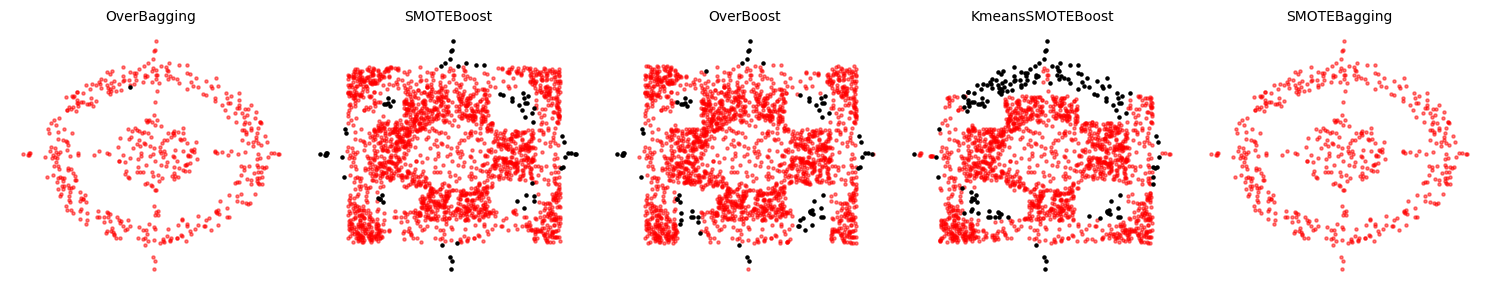

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "plot2_noisy_0"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
